In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install mlflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import os
import mlflow  

os.environ["MLFLOW_TRACKING_USERNAME"] = "admin"
os.environ["MLFLOW_TRACKING_PASSWORD"] = "xx"
os.environ["MLFLOW_TRACKING_URI"] = "https://caddy-production-3734.up.railway.app/"


mlflow.set_tracking_uri(os.environ["MLFLOW_TRACKING_URI"])

mlflow.set_experiment("movielens_10m_svd_rf")

print("Current tracking URI:", mlflow.get_tracking_uri())


Current tracking URI: https://caddy-production-3734.up.railway.app/


In [5]:
import pandas as pd

movies_df = pd.read_csv(
    "movies.dat",
    sep="::",
    engine="python",   # REQUIRED for multi-character separator
    header=None,
  encoding='latin-1'
)
print(movies_df.head())

   0                                   1  \
0  1                    Toy Story (1995)   
1  2                      Jumanji (1995)   
2  3             Grumpier Old Men (1995)   
3  4            Waiting to Exhale (1995)   
4  5  Father of the Bride Part II (1995)   

                                             2  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


In [6]:
import pandas as pd

ratings_df = pd.read_csv(
    "ratings.dat",
    sep="::",
    engine="python",   # REQUIRED for multi-character separator
    header=None,
  encoding='latin-1'
)
print(ratings_df.head())

   0    1    2          3
0  1  122  5.0  838985046
1  1  185  5.0  838983525
2  1  231  5.0  838983392
3  1  292  5.0  838983421
4  1  316  5.0  838983392


In [9]:
import pandas as pd

tags_df = pd.read_csv(
    "tags.dat",
    sep="::",
    engine="python",   # REQUIRED for multi-character separator
    header=None,
  encoding='latin-1'
)
print(tags_df.head())

    0     1                2           3
0  15  4973       excellent!  1215184630
1  20  1747         politics  1188263867
2  20  1747           satire  1188263867
3  20  2424  chick flick 212  1188263835
4  20  2424            hanks  1188263835


In [10]:
ratings = pd.read_csv(
    "ratings.dat",
    sep="::",
    engine="python",
    header=None,
    encoding="latin-1",
    names=["user_id", "movie_id", "rating", "timestamp"]
)

tags_df = pd.read_csv(
    "tags.dat",
    sep="::",
    engine="python",
    header=None,
    encoding="latin-1",
    names=["user_id", "gender", "age", "occupation", "zip_code"]
)

movies_df = pd.read_csv(
    "movies.dat",
    sep="::",
    engine="python",
    header=None,
    encoding="latin-1",
    names=["movie_id", "title", "genres"]
)


In [11]:
import pandas as pd

# ratings.dat: user_id::movie_id::rating::timestamp
ratings_df = pd.read_csv(
    "ratings.dat",
    sep="::",
    engine="python",
    header=None,
    encoding="latin-1",
    usecols=[0, 1, 2, 3],   
    names=["user_id", "movie_id", "rating", "timestamp"]
)

# movies.dat: movie_id::title::genres  
movies_df = pd.read_csv(
    "movies.dat",
    sep="::",
    engine="python",
    header=None,
    encoding="latin-1",
    usecols=[0, 1, 2],     
    names=["movie_id", "title", "genres"]
)

# tags.dat: user_id::movie_id::tag::timestamp
tags_df = pd.read_csv(
    "tags.dat",
    sep="::",
    engine="python",
    header=None,
    encoding="latin-1",
    usecols=[0, 1, 2, 3],   
    names=["user_id", "movie_id", "tag", "timestamp"]
)

print("Ratings:", ratings_df.shape, ratings_df.columns.tolist())
print("Movies :", movies_df.shape, movies_df.columns.tolist())
print("Tags   :", tags_df.shape, tags_df.columns.tolist())

print("\nRatings head:\n", ratings_df.head())
print("\nMovies head:\n", movies_df.head())
print("\nTags head:\n", tags_df.head())


Ratings: (10000054, 4) ['user_id', 'movie_id', 'rating', 'timestamp']
Movies : (10681, 3) ['movie_id', 'title', 'genres']
Tags   : (95580, 4) ['user_id', 'movie_id', 'tag', 'timestamp']

Ratings head:
    user_id  movie_id  rating  timestamp
0        1       122     5.0  838985046
1        1       185     5.0  838983525
2        1       231     5.0  838983392
3        1       292     5.0  838983421
4        1       316     5.0  838983392

Movies head:
    movie_id                               title  \
0         1                    Toy Story (1995)   
1         2                      Jumanji (1995)   
2         3             Grumpier Old Men (1995)   
3         4            Waiting to Exhale (1995)   
4         5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|R

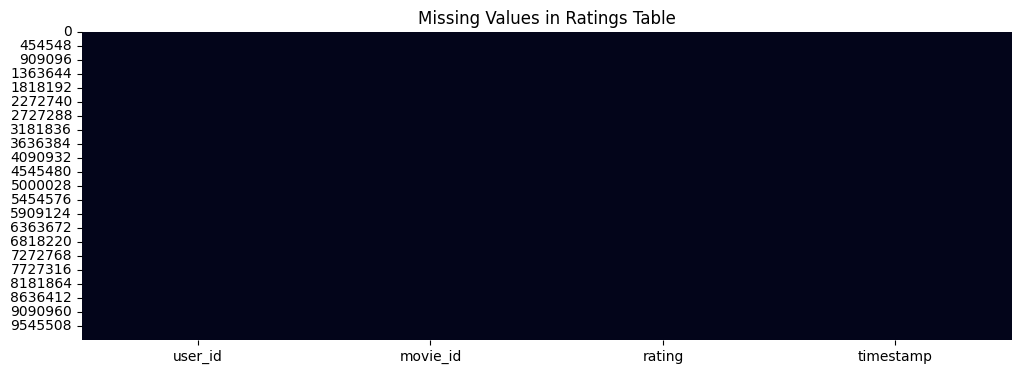

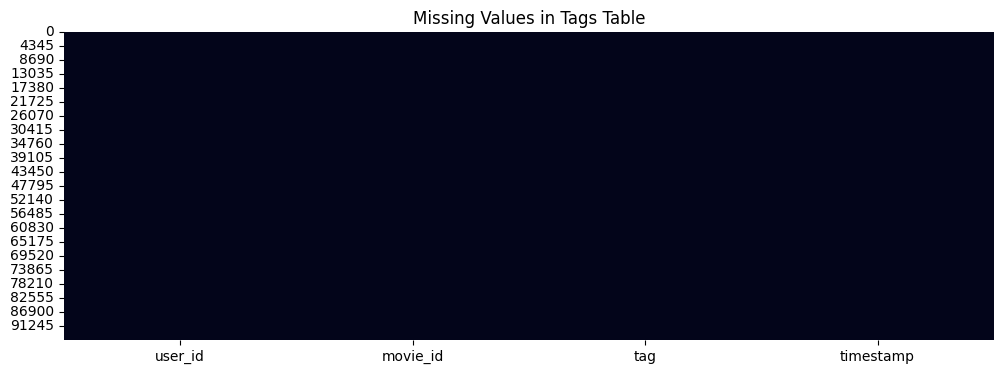

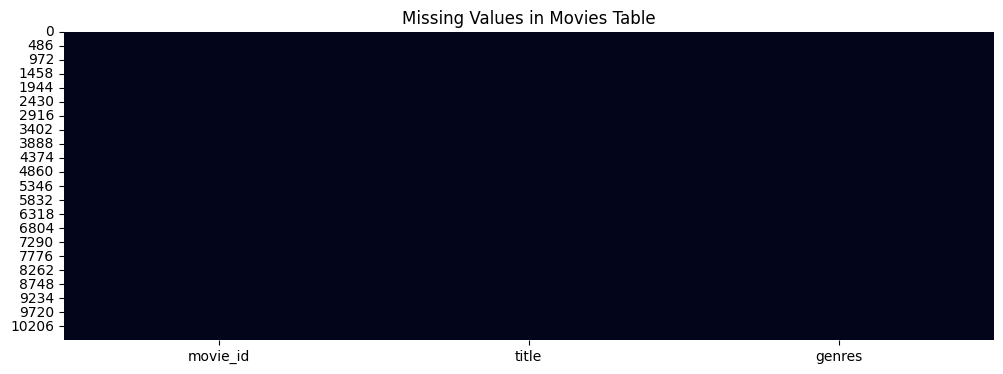

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
sns.heatmap(ratings.isnull(), cbar=False)
plt.title("Missing Values in Ratings Table")
plt.show()

plt.figure(figsize=(12, 4))
sns.heatmap(tags_df.isnull(), cbar=False)
plt.title("Missing Values in Tags Table")
plt.show()

plt.figure(figsize=(12, 4))
sns.heatmap(movies_df.isnull(), cbar=False)
plt.title("Missing Values in Movies Table")
plt.show()


In [13]:
import numpy as np

# ---- Ratings: drop NaN ----
before = len(ratings)
ratings = ratings.dropna(subset=["user_id", "movie_id", "rating"])
after = len(ratings)
print(f"Dropped NaNs in ratings: {before - after}")

# ---- Ratings: keep rating in [1, 5] ----
before = len(ratings)
ratings = ratings[(ratings["rating"] >= 1) & (ratings["rating"] <= 5)]
after = len(ratings)
print(f"Dropped out-of-range ratings: {before - after}")

# ---- Ratings: remove duplicate (user_id, movie_id) pairs ----
before = len(ratings)
ratings = ratings.drop_duplicates(subset=["user_id", "movie_id"])
after = len(ratings)
print(f"Dropped duplicate (user, movie) pairs: {before - after}")

# ---- Movies: drop NaN + duplicates on movie_id ----
before = len(movies_df)
movies_df = movies_df.dropna(subset=["movie_id"])
movies_df = movies_df.drop_duplicates(subset=["movie_id"])
after = len(movies_df)
print(f"Movies cleaned: {before} -> {after}")


Dropped NaNs in ratings: 0
Dropped out-of-range ratings: 94988
Dropped duplicate (user, movie) pairs: 0
Movies cleaned: 10681 -> 10681


In [ ]:
#  Tags: clean properly (MovieLens 10M) 
before = len(tags_df)

# 1) drop rows with missing essentials
tags_df = tags_df.dropna(subset=["user_id", "movie_id", "tag"])

# 2) normalize tag text
tags_df["tag"] = (
    tags_df["tag"].astype(str)
    .str.strip()
    .str.lower()
)

# 3) drop empty tags after cleaning
tags_df = tags_df[tags_df["tag"] != ""]

# 4) (optional) remove exact duplicate tag events
# keep duplicates across different movies/users; only remove truly identical rows
tags_df = tags_df.drop_duplicates(subset=["user_id", "movie_id", "tag", "timestamp"])

after = len(tags_df)
print(f"Tags cleaned: {before} -> {after} (removed {before - after})")
print("Tags columns:", tags_df.columns.tolist())
print(tags_df.head())


Tags cleaned: 95580 -> 95564 (removed 16)
Tags columns: ['user_id', 'movie_id', 'tag', 'timestamp']
   user_id  movie_id              tag   timestamp
0       15      4973       excellent!  1215184630
1       20      1747         politics  1188263867
2       20      1747           satire  1188263867
3       20      2424  chick flick 212  1188263835
4       20      2424            hanks  1188263835


In [15]:
# movie-level tag popularity features (good for RF)
movie_tag_stats = (
    tags_df.groupby("movie_id")["tag"]
    .agg(movie_num_tags="count", movie_num_unique_tags="nunique")
    .reset_index()
)

# later: full_df = full_df.merge(movie_tag_stats, on="movie_id", how="left").fillna(0)


In [16]:
print("\nCurrent shapes after basic cleaning:")
print("  ratings :", ratings.shape)
print("  movies  :", movies_df.shape)
print("  tags    :", tags_df.shape)  


# 1) Convert timestamp to datetime
ratings["timestamp"] = pd.to_datetime(ratings["timestamp"], unit="s")

# 2) MovieLens 10M: NO users.dat -> skip user demographics block
print("\n==== MovieLens 10M: no users.dat (skip user demographics) ====")
users_df = None  # keep placeholder if later code expects it

# 3) Movies: extract year, clean title, split genres
print("\n==== Movies: extract year / clean title / split genres ====")

# 3.1 extract year from title "(1995)"
year_extracted = movies_df["title"].str.extract(r"\((\d{4})\)", expand=False)
movies_df["year"] = pd.to_numeric(year_extracted, errors="coerce")

# 3.2 clean title (remove year part)
movies_df["clean_title"] = (
    movies_df["title"].astype(str)
    .str.replace(r"\(\d{4}\)", "", regex=True)
    .str.strip()
)

# 3.3 genres -> list
movies_df["genres"] = movies_df["genres"].fillna("(no genres listed)")
movies_df["genres_list"] = movies_df["genres"].astype(str).str.split("|")

print("Movies columns now:", movies_df.columns.tolist())



Current shapes after basic cleaning:
  ratings : (9905066, 4)
  movies  : (10681, 3)
  tags    : (95564, 4)

==== MovieLens 10M: no users.dat (skip user demographics) ====

==== Movies: extract year / clean title / split genres ====
Movies columns now: ['movie_id', 'title', 'genres', 'year', 'clean_title', 'genres_list']


In [17]:
print("ratings_df:", ratings_df.shape)
print("movies_df :", movies_df.shape)
print("tags_df   :", tags_df.shape)

print("\ncolumns check:")
print("ratings_df cols:", ratings_df.columns.tolist())
print("movies_df  cols:", movies_df.columns.tolist())
print("tags_df    cols:", tags_df.columns.tolist())


ratings_df: (10000054, 4)
movies_df : (10681, 6)
tags_df   : (95564, 4)

columns check:
ratings_df cols: ['user_id', 'movie_id', 'rating', 'timestamp']
movies_df  cols: ['movie_id', 'title', 'genres', 'year', 'clean_title', 'genres_list']
tags_df    cols: ['user_id', 'movie_id', 'tag', 'timestamp']


In [ ]:
import os
import numpy as np
import pandas as pd

# Step 3) Movie feature cleanup (same as 1M)

# 3.1 Extract year from title "(1995)"
year_extracted = movies_df["title"].astype(str).str.extract(r"\((\d{4})\)", expand=False)
movies_df["year"] = pd.to_numeric(year_extracted, errors="coerce")

# 3.2 Clean title (remove year part)
movies_df["clean_title"] = (
    movies_df["title"].astype(str)
    .str.replace(r"\(\d{4}\)", "", regex=True)
    .str.strip()
)

# 3.3 Genres -> list
movies_df["genres"] = movies_df["genres"].fillna("(no genres listed)")
movies_df["genres_list"] = movies_df["genres"].astype(str).str.split("|")

print("Movies columns now:", movies_df.columns.tolist())


# Step 4) Filter low-activity users & movies based on RATINGS (same as 1M)
print("\n==== Filter low-activity users & movies in ratings_df ====")

ratings = ratings_df.copy()  # keep naming consistent with your 1M code

# users with at least 5 ratings
user_counts = ratings["user_id"].value_counts()
valid_users = user_counts[user_counts >= 5].index

before = len(ratings)
ratings = ratings[ratings["user_id"].isin(valid_users)]
after = len(ratings)
print(f"Keep users with >=5 ratings: {before} -> {after}  (removed {before - after})")

# movies with at least 5 ratings
movie_counts = ratings["movie_id"].value_counts()
valid_movies = movie_counts[movie_counts >= 5].index

before = len(ratings)
ratings = ratings[ratings["movie_id"].isin(valid_movies)]
after = len(ratings)
print(f"Keep movies with >=5 ratings: {before} -> {after}  (removed {before - after})")

print("\nShapes after activity filtering:")
print("  ratings :", ratings.shape)
print("  movies  :", movies_df.shape)
print("  tags    :", tags_df.shape if "tags_df" in globals() else "N/A")

# Step 5) Merge ratings + movies (10M has NO users.dat)
print("\n==== Merge ratings + movies (10M) ====")

full_df = (
    ratings
    .merge(movies_df, on="movie_id", how="inner")
)

print("Final full_df shape:", full_df.shape)
print("Full_df columns:", full_df.columns.tolist())

# Add TAG-based movie features (recommended for RF, safe for SVD)

ADD_TAG_FEATURES = True

if ADD_TAG_FEATURES and "tags_df" in globals():
    print("\n==== Add tag-based movie features (optional) ====")

    # Basic tag features per movie
    movie_tag_feats = (
        tags_df.dropna(subset=["movie_id", "tag"])
        .groupby("movie_id")
        .agg(
            num_tags=("tag", "count"),
            num_unique_tags=("tag", "nunique"),
        )
        .reset_index()
    )

    full_df = full_df.merge(movie_tag_feats, on="movie_id", how="left")
    full_df[["num_tags", "num_unique_tags"]] = full_df[["num_tags", "num_unique_tags"]].fillna(0).astype(np.int32)

    print("Added tag features. full_df shape:", full_df.shape)

# Step 6) Save cleaned dataset (same as 1M)
output_dir = "processed"
os.makedirs(output_dir, exist_ok=True)

full_df.to_parquet(os.path.join(output_dir, "movielens_10m_clean.parquet"), index=False)
full_df.to_csv(os.path.join(output_dir, "movielens_10m_clean.csv"), index=False)

print("\nSaved cleaned dataset to:")
print(" ", os.path.join(output_dir, "movielens_10m_clean.parquet"))
print(" ", os.path.join(output_dir, "movielens_10m_clean.csv"))


Movies columns now: ['movie_id', 'title', 'genres', 'year', 'clean_title', 'genres_list']

==== Filter low-activity users & movies in ratings_df ====
Keep users with >=5 ratings: 10000054 -> 10000054  (removed 0)
Keep movies with >=5 ratings: 10000054 -> 9998816  (removed 1238)

Shapes after activity filtering:
  ratings : (9998816, 4)
  movies  : (10681, 6)
  tags    : (95564, 4)

==== Merge ratings + movies (10M) ====
Final full_df shape: (9998816, 9)
Full_df columns: ['user_id', 'movie_id', 'rating', 'timestamp', 'title', 'genres', 'year', 'clean_title', 'genres_list']

==== Add tag-based movie features (optional) ====
Added tag features. full_df shape: (9998816, 11)

Saved cleaned dataset to:
  processed\movielens_10m_clean.parquet
  processed\movielens_10m_clean.csv


In [ ]:
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
from sklearn.model_selection import train_test_split

# 0) Train/Test split (interaction-level)
train_ratings, test_ratings = train_test_split(
    ratings_df[["user_id", "movie_id", "rating"]],
    test_size=0.2,
    random_state=42
)

# Keep only users/items that appear in TRAIN (avoid cold-start in eval)
train_users = set(train_ratings["user_id"].unique())
train_items = set(train_ratings["movie_id"].unique())

test_ratings = test_ratings[
    test_ratings["user_id"].isin(train_users) &
    test_ratings["movie_id"].isin(train_items)
].copy()

print("Train shape:", train_ratings.shape)
print("Test shape :", test_ratings.shape)

# 1) Build ID -> index mappings from TRAIN only

unique_users = train_ratings["user_id"].unique()
unique_movies = train_ratings["movie_id"].unique()

user2idx = {u: i for i, u in enumerate(unique_users)}
movie2idx = {m: i for i, m in enumerate(unique_movies)}

n_users = len(user2idx)
n_items = len(movie2idx)


# 2) Build sparse user-item matrix from TRAIN only
rows = train_ratings["user_id"].map(user2idx).values
cols = train_ratings["movie_id"].map(movie2idx).values
vals = train_ratings["rating"].values.astype(np.float32)

user_item_matrix = csr_matrix((vals, (rows, cols)), shape=(n_users, n_items))

# Correct sparsity for sparse matrix
sparsity = 1 - user_item_matrix.nnz / (n_users * n_items)

print("User–Item matrix shape:", user_item_matrix.shape)
print("Sparsity:", float(sparsity))


Train shape: (8000043, 3)
Test shape : (1999982, 3)
User–Item matrix shape: (69878, 10653)
Sparsity: 0.9892531811628504


In [20]:
import numpy as np
import pandas as pd

from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

import mlflow
import os


In [21]:
ratings = pd.read_csv(
    "ratings.dat",
    sep="::",
    engine="python",
    header=None,
    names=["user_id", "movie_id", "rating", "timestamp"],
    encoding="latin-1"
)

movies = pd.read_csv(
    "movies.dat",
    sep="::",
    engine="python",
    header=None,
    names=["movie_id", "title", "genres"],
    encoding="latin-1"
)

print(ratings.head())
print(movies.head())


   user_id  movie_id  rating  timestamp
0        1       122     5.0  838985046
1        1       185     5.0  838983525
2        1       231     5.0  838983392
3        1       292     5.0  838983421
4        1       316     5.0  838983392
   movie_id                               title  \
0         1                    Toy Story (1995)   
1         2                      Jumanji (1995)   
2         3             Grumpier Old Men (1995)   
3         4            Waiting to Exhale (1995)   
4         5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


In [22]:
# Basic sanity cleaning
ratings = ratings.dropna(subset=["user_id", "movie_id", "rating"])
ratings = ratings[(ratings["rating"] >= 0.5) & (ratings["rating"] <= 5.0)]
ratings = ratings.drop_duplicates(subset=["user_id", "movie_id"], keep="last")

# Parse genres
movies["genres"] = movies["genres"].fillna("(no genres listed)")
movies["genres_list"] = movies["genres"].str.split("|")

print("ratings shape:", ratings.shape)
print("movies  shape:", movies.shape)


ratings shape: (10000054, 4)
movies  shape: (10681, 4)


In [23]:
train_ratings, test_ratings = train_test_split(
    ratings[["user_id", "movie_id", "rating"]],
    test_size=0.2,
    random_state=42
)

# Avoid cold-start in evaluation (test users/items must exist in train)
train_users = set(train_ratings["user_id"].unique())
train_items = set(train_ratings["movie_id"].unique())

test_ratings = test_ratings[
    test_ratings["user_id"].isin(train_users) &
    test_ratings["movie_id"].isin(train_items)
].copy()

print("Train:", train_ratings.shape, "Test:", test_ratings.shape)


Train: (8000043, 3) Test: (1999982, 3)


In [24]:
# Build mappings from TRAIN only
unique_users  = train_ratings["user_id"].unique()
unique_movies = train_ratings["movie_id"].unique()

user2idx = {u:i for i,u in enumerate(unique_users)}
movie2idx = {m:i for i,m in enumerate(unique_movies)}
idx2movie = {i:m for m,i in movie2idx.items()}

n_users = len(user2idx)
n_items = len(movie2idx)

u_idx = train_ratings["user_id"].map(user2idx).values.astype(np.int32)
i_idx = train_ratings["movie_id"].map(movie2idx).values.astype(np.int32)
r_vals = train_ratings["rating"].values.astype(np.float32)

R = csr_matrix((r_vals, (u_idx, i_idx)), shape=(n_users, n_items))

sparsity = 1 - R.nnz / (n_users * n_items)
print("R shape:", R.shape, "sparsity:", float(sparsity))

# Item-mean centering (TRAIN only)
item_sum = np.array(R.sum(axis=0)).ravel()
item_cnt = np.diff(R.tocsc().indptr)

item_means = np.zeros_like(item_sum, dtype=np.float32)
mask = item_cnt > 0
item_means[mask] = (item_sum[mask] / item_cnt[mask]).astype(np.float32)

global_mean = float(train_ratings["rating"].mean())

r_centered = r_vals - item_means[i_idx]
R_centered = csr_matrix((r_centered, (u_idx, i_idx)), shape=(n_users, n_items))

# SVD
n_factors = 100
U, s, Vt = svds(R_centered, k=n_factors)

# sort singular values descending
order = np.argsort(s)[::-1]
s = s[order]; U = U[:, order]; Vt = Vt[order, :]

pred_centered = U @ np.diag(s) @ Vt
print("SVD done:", pred_centered.shape)


R shape: (69878, 10653) sparsity: 0.9892531811628504
SVD done: (69878, 10653)


In [25]:
# Precompute watched items in TRAIN
train_watched = train_ratings.groupby("user_id")["movie_id"].apply(set).to_dict()

def predict_rating_svd(user_id, movie_id):
    """Predict rating using centered SVD + add back item mean."""
    if user_id not in user2idx or movie_id not in movie2idx:
        return global_mean
    u = user2idx[user_id]
    i = movie2idx[movie_id]
    pred = pred_centered[u, i] + item_means[i]
    return float(np.clip(pred, 0.5, 5.0))

def recommend_topN_svd(user_id, N=10):
    """Top-N movie_ids excluding TRAIN watched."""
    if user_id not in user2idx:
        return []
    u = user2idx[user_id]
    watched = train_watched.get(user_id, set())

    scores = (pred_centered[u, :] + item_means).copy()

    for mid in watched:
        if mid in movie2idx:
            scores[movie2idx[mid]] = -np.inf

    top_idx = np.argsort(scores)[-N:][::-1]
    return [idx2movie[i] for i in top_idx]


In [26]:
# RMSE on TEST
y_true = test_ratings["rating"].values.astype(np.float32)
y_pred = np.array([predict_rating_svd(u, m) for u, m in zip(test_ratings["user_id"], test_ratings["movie_id"])])
svd_rmse = float(np.sqrt(mean_squared_error(y_true, y_pred)))
print("SVD RMSE:", svd_rmse)

def precision_recall_at_k_svd(k=10, pos_threshold=4.0, max_users=500):
    """Relevant items from TEST, recs exclude TRAIN watched."""
    test_pos = (
        test_ratings[test_ratings["rating"] >= pos_threshold]
        .groupby("user_id")["movie_id"].apply(set).to_dict()
    )

    users = list(test_pos.keys())[:max_users]
    precisions, recalls = [], []

    for uid in users:
        pos = test_pos[uid]
        if len(pos) == 0:
            continue
        recs = set(recommend_topN_svd(uid, N=k))
        hits = len(recs & pos)
        precisions.append(hits / k)
        recalls.append(hits / len(pos))

    return float(np.mean(precisions)) if precisions else 0.0, float(np.mean(recalls)) if recalls else 0.0

svd_p10, svd_r10 = precision_recall_at_k_svd(k=10, max_users=500)
print("SVD P@10:", svd_p10, "SVD R@10:", svd_r10)


SVD RMSE: 0.8911354577245921
SVD P@10: 0.0064 SVD R@10: 0.0016671103087561967


In [29]:
import pandas as pd

ratings = pd.read_csv(
    "ratings.dat", sep="::", engine="python", header=None, encoding="latin-1",
    names=["user_id", "movie_id", "rating", "timestamp"]
)

movies_df = pd.read_csv(
    "movies.dat", sep="::", engine="python", header=None, encoding="latin-1",
    names=["movie_id", "title", "genres"]
)

tags_df = pd.read_csv(
    "tags.dat", sep="::", engine="python", header=None, encoding="latin-1",
    names=["user_id", "movie_id", "tag", "timestamp"]
)

print(ratings.head())
print(movies_df.head())
print(tags_df.head())


   user_id  movie_id  rating  timestamp
0        1       122     5.0  838985046
1        1       185     5.0  838983525
2        1       231     5.0  838983392
3        1       292     5.0  838983421
4        1       316     5.0  838983392
   movie_id                               title  \
0         1                    Toy Story (1995)   
1         2                      Jumanji (1995)   
2         3             Grumpier Old Men (1995)   
3         4            Waiting to Exhale (1995)   
4         5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  
   user_id  movie_id              tag   timestamp
0       15      4973       excellent!  1215184630
1       20      1747         politics  1188263867
2       2

In [ ]:
import numpy as np
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import mlflow

RANDOM_SEED = 42

# ---- split ----
train_ratings, test_ratings = train_test_split(
    ratings[["user_id", "movie_id", "rating"]],
    test_size=0.2,
    random_state=RANDOM_SEED
)

# keep test within train universe (avoid cold-start in evaluation)
train_users = set(train_ratings["user_id"].unique())
train_items = set(train_ratings["movie_id"].unique())
test_ratings = test_ratings[
    test_ratings["user_id"].isin(train_users) &
    test_ratings["movie_id"].isin(train_items)
].copy()

# mappings from TRAIN only
unique_users = train_ratings["user_id"].unique()
unique_movies = train_ratings["movie_id"].unique()
user2idx = {u:i for i,u in enumerate(unique_users)}
movie2idx = {m:i for i,m in enumerate(unique_movies)}
idx2movie = {i:m for m,i in movie2idx.items()}

u_idx = train_ratings["user_id"].map(user2idx).values
i_idx = train_ratings["movie_id"].map(movie2idx).values
r_vals = train_ratings["rating"].values.astype(np.float32)

n_users, n_items = len(user2idx), len(movie2idx)

# sparse rating matrix (train)
R = csr_matrix((r_vals, (u_idx, i_idx)), shape=(n_users, n_items))
sparsity = 1 - R.nnz / (n_users * n_items)
global_mean = float(r_vals.mean())

#compute item mean and user mean (train only) 
item_sum = np.array(R.sum(axis=0)).ravel()
item_cnt = np.diff(R.tocsc().indptr)
item_mean = np.zeros(n_items, dtype=np.float32)
nz = item_cnt > 0
item_mean[nz] = (item_sum[nz] / item_cnt[nz]).astype(np.float32)

user_sum = np.array(R.sum(axis=1)).ravel()
user_cnt = np.diff(R.tocsr().indptr)
user_mean = np.zeros(n_users, dtype=np.float32)
nz_u = user_cnt > 0
user_mean[nz_u] = (user_sum[nz_u] / user_cnt[nz_u]).astype(np.float32)

# bias terms (train only) 
# simple bias: b_u = user_mean - global_mean, b_i = item_mean - global_mean
b_u = user_mean - global_mean
b_i = item_mean - global_mean

def train_svd_with_bias(k=100):
    """
    Train SVD on a centered matrix:
    r_ui_centered = r_ui - (global_mean + b_u[u] + b_i[i])
    """
    baseline = global_mean + b_u[u_idx] + b_i[i_idx]
    r_centered = r_vals - baseline

    R_centered = csr_matrix((r_centered, (u_idx, i_idx)), shape=(n_users, n_items))

    U, s, Vt = svds(R_centered, k=k)

    # sort singular values descending
    order = np.argsort(s)[::-1]
    s = s[order]
    U = U[:, order]
    Vt = Vt[order, :]

    pred_centered = U @ np.diag(s) @ Vt
    return pred_centered

def predict_rating(user_id, movie_id, pred_centered):
    """Predict rating with bias + SVD residual."""
    if user_id not in user2idx or movie_id not in movie2idx:
        return global_mean
    u = user2idx[user_id]
    i = movie2idx[movie_id]
    pred = global_mean + b_u[u] + b_i[i] + pred_centered[u, i]
    return float(np.clip(pred, 1.0, 5.0))

def rmse_on_test(pred_centered):
    y_true = test_ratings["rating"].values
    y_pred = np.array([
        predict_rating(u, m, pred_centered)
        for u, m in zip(test_ratings["user_id"], test_ratings["movie_id"])
    ], dtype=np.float32)
    return float(np.sqrt(mean_squared_error(y_true, y_pred)))

# correct TopK evaluation: positives from TEST, exclude TRAIN watched
train_watched = train_ratings.groupby("user_id")["movie_id"].apply(set).to_dict()

def recommend_topN_svd_bias(user_id, pred_centered, N=10):
    if user_id not in user2idx:
        return []
    u = user2idx[user_id]
    watched = train_watched.get(user_id, set())

    # full score = baseline + residual
    scores = (global_mean + b_u[u] + b_i + pred_centered[u, :]).copy()

    for mid in watched:
        if mid in movie2idx:
            scores[movie2idx[mid]] = -np.inf

    top_idx = np.argsort(scores)[-N:][::-1]
    return [idx2movie[i] for i in top_idx]

def precision_recall_at_k_svd_bias(pred_centered, k=10, pos_threshold=4.0, max_users=500):
    test_pos = (
        test_ratings[test_ratings["rating"] >= pos_threshold]
        .groupby("user_id")["movie_id"].apply(set).to_dict()
    )
    users = list(test_pos.keys())[:max_users]
    precisions, recalls = [], []
    for uid in users:
        pos = test_pos[uid]
        recs = set(recommend_topN_svd_bias(uid, pred_centered, N=k))
        hits = len(recs & pos)
        precisions.append(hits / k)
        recalls.append(hits / len(pos))
    p = float(np.mean(precisions)) if precisions else 0.0
    r = float(np.mean(recalls)) if recalls else 0.0
    return p, r

#  MLflow sweep over k (real optimization) 
mlflow.set_experiment("movielens_10m_svd_rf")

for k in [50, 100, 150]:
    with mlflow.start_run(run_name=f"svd_bias_k{k}"):
        mlflow.log_param("model_type", "SVD_svds_bias_centered")
        mlflow.log_param("k", k)
        mlflow.log_param("seed", RANDOM_SEED)
        mlflow.log_param("train_size", int(len(train_ratings)))
        mlflow.log_param("test_size", int(len(test_ratings)))
        mlflow.log_param("sparsity", float(sparsity))

        pred_centered = train_svd_with_bias(k=k)
        rmse = rmse_on_test(pred_centered)
        p10, r10 = precision_recall_at_k_svd_bias(pred_centered, k=10, max_users=500)

        mlflow.log_metric("rmse_test", rmse)
        mlflow.log_metric("precision_at_10", p10)
        mlflow.log_metric("recall_at_10", r10)

        print(f"[k={k}] RMSE={rmse:.4f}  P@10={p10:.4f}  R@10={r10:.4f}")


[k=50] RMSE=0.8512  P@10=0.0064  R@10=0.0032
🏃 View run svd_bias_k50 at: https://caddy-production-3734.up.railway.app/#/experiments/5/runs/acacd53a853d4008ae9492bea41a90a6
🧪 View experiment at: https://caddy-production-3734.up.railway.app/#/experiments/5
[k=100] RMSE=0.8531  P@10=0.0026  R@10=0.0010
🏃 View run svd_bias_k100 at: https://caddy-production-3734.up.railway.app/#/experiments/5/runs/813e71e288f548119015dfa3c41eee76
🧪 View experiment at: https://caddy-production-3734.up.railway.app/#/experiments/5
[k=150] RMSE=0.8547  P@10=0.0020  R@10=0.0009
🏃 View run svd_bias_k150 at: https://caddy-production-3734.up.railway.app/#/experiments/5/runs/8ed8176d2beb4b6fafb08b0d63a2e0b5
🧪 View experiment at: https://caddy-production-3734.up.railway.app/#/experiments/5


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import normalize


# 0) Config
SEED = 42
K = 50                 # latent factors
EPOCHS = 3             
LR = 0.01
REG = 0.02
POS_TH = 4.0           # positive threshold
TOPK = 10
MAX_USERS_EVAL = 500   

ALPHA = 0.8            # hybrid: alpha*svd + (1-alpha)*tag
TAG_MIN_COUNT = 20     # Filter out overly niche tags to reduce noise

rng = np.random.RandomState(SEED)

# Safety checks
req_cols = {"user_id","movie_id","rating"}
assert req_cols.issubset(train_ratings.columns), "train_ratings columns missing"
assert req_cols.issubset(test_ratings.columns),  "test_ratings columns missing"
assert {"user_id","movie_id","tag"}.issubset(tags_df.columns), "tags_df columns missing"

# 1) Build ID mappings (TRAIN ONLY)
unique_users = train_ratings["user_id"].unique()
unique_items = train_ratings["movie_id"].unique()

user2idx = {u:i for i,u in enumerate(unique_users)}
item2idx = {m:i for i,m in enumerate(unique_items)}
idx2item = {i:m for m,i in item2idx.items()}

n_users = len(user2idx)
n_items = len(item2idx)

# Keep test only for known users/items (avoid cold start in eval)
test_ratings = test_ratings[
    test_ratings["user_id"].isin(user2idx) &
    test_ratings["movie_id"].isin(item2idx)
].copy()

print("n_users:", n_users, "n_items:", n_items)
print("train:", train_ratings.shape, "test:", test_ratings.shape)


# 2) Prepare training arrays
u_idx = train_ratings["user_id"].map(user2idx).values.astype(np.int32)
i_idx = train_ratings["movie_id"].map(item2idx).values.astype(np.int32)
r = train_ratings["rating"].values.astype(np.float32)

mu = float(r.mean())                     # global mean
bu = np.zeros(n_users, dtype=np.float32) # user bias
bi = np.zeros(n_items, dtype=np.float32) # item bias
P = (0.01 * rng.randn(n_users, K)).astype(np.float32)
Q = (0.01 * rng.randn(n_items, K)).astype(np.float32)

# 3) Train Bias-SVD with SGD
idxs = np.arange(len(r), dtype=np.int32)

for ep in range(1, EPOCHS+1):
    rng.shuffle(idxs)
    for t in idxs:
        u = u_idx[t]
        i = i_idx[t]
        rt = r[t]

        pred = mu + bu[u] + bi[i] + np.dot(P[u], Q[i])
        err = rt - pred

        bu[u] += LR * (err - REG * bu[u])
        bi[i] += LR * (err - REG * bi[i])

        Pu = P[u].copy()
        P[u] += LR * (err * Q[i] - REG * P[u])
        Q[i] += LR * (err * Pu   - REG * Q[i])

    # quick train rmse (on train)
    pred_train = mu + bu[u_idx] + bi[i_idx] + np.sum(P[u_idx]*Q[i_idx], axis=1)
    rmse_train = float(np.sqrt(np.mean((r - pred_train)**2)))
    print(f"[epoch {ep}/{EPOCHS}] train RMSE: {rmse_train:.4f}")

# 4) Fast SVD scoring for one user (vectorized over all items)
def svd_scores_all_items(user_id: int):
    """Return scores for all items (len n_items) for this user."""
    if user_id not in user2idx:
        return None
    u = user2idx[user_id]
    # mu + bu[u] + bi + P[u] @ Q.T
    return (mu + bu[u] + bi + P[u] @ Q.T).astype(np.float32)

# 5) Build TAG item vectors (movie -> tag TF vector)
#    Use tags for MOVIES in train universe only.
tags_use = tags_df[tags_df["movie_id"].isin(item2idx)].copy()
tags_use["tag"] = tags_use["tag"].astype(str).str.strip().str.lower()

# optional: filter very rare tags
tag_counts = tags_use["tag"].value_counts()
keep_tags = set(tag_counts[tag_counts >= TAG_MIN_COUNT].index)
tags_use = tags_use[tags_use["tag"].isin(keep_tags)].copy()

# build tag index
unique_tags = tags_use["tag"].unique()
tag2idx = {t:i for i,t in enumerate(unique_tags)}
D = len(tag2idx)
print("Tag vocab size:", D, "tag rows:", len(tags_use))

# item_tag_matrix: shape (n_items, D) as dense float32 (D usually manageable)
# We use simple counts per movie.
item_tag = np.zeros((n_items, D), dtype=np.float32)
for mid, grp in tags_use.groupby("movie_id"):
    i = item2idx[mid]
    for t in grp["tag"].values:
        item_tag[i, tag2idx[t]] += 1.0

# normalize item tag vectors for cosine scoring
item_tag_norm = normalize(item_tag, norm="l2", axis=1)

# 6) Build USER tag preference vectors from TRAIN positives
train_pos = train_ratings[train_ratings["rating"] >= POS_TH].copy()
train_pos = train_pos[train_pos["movie_id"].isin(item2idx)]

user_pref = {}  # user_id -> 1xD normalized vector
for uid, grp in train_pos.groupby("user_id"):
    # sum tag vectors of liked movies (rating-weighted optional; keep simple now)
    item_indices = [item2idx[m] for m in grp["movie_id"].values]
    if not item_indices:
        continue
    v = item_tag_norm[item_indices].sum(axis=0)      # shape (D,)
    v = np.asarray(v).reshape(1, -1)                 # make 2D
    v = normalize(v, norm="l2")                      # 1xD
    user_pref[uid] = v.astype(np.float32)

# 7) Hybrid recommend TopK
train_watched = train_ratings.groupby("user_id")["movie_id"].apply(set).to_dict()

def recommend_hybrid_topk(user_id: int, k=TOPK, alpha=ALPHA):
    svd_scores = svd_scores_all_items(user_id)
    if svd_scores is None:
        return []

    # tag cosine scores (0 if no pref)
    if user_id in user_pref and D > 0:
        v = user_pref[user_id]                       # 1xD
        tag_scores = (item_tag_norm @ v.T).ravel()   # (n_items,)
        tag_scores = tag_scores.astype(np.float32)
    else:
        tag_scores = np.zeros(n_items, dtype=np.float32)

    # min-max normalize both to comparable range
    def minmax(x):
        mn, mx = float(np.min(x)), float(np.max(x))
        if mx - mn < 1e-8:
            return np.zeros_like(x)
        return (x - mn) / (mx - mn)

    s1 = minmax(svd_scores)
    s2 = minmax(tag_scores)
    scores = alpha * s1 + (1 - alpha) * s2

    # exclude watched in TRAIN
    watched = train_watched.get(user_id, set())
    for m in watched:
        if m in item2idx:
            scores[item2idx[m]] = -np.inf

    top_idx = np.argsort(scores)[-k:][::-1]
    return [idx2item[i] for i in top_idx]

# 8) Evaluate P@10 / R@10 on TEST positives
def eval_topk_hybrid(k=TOPK, pos_th=POS_TH, max_users=MAX_USERS_EVAL, alpha=ALPHA):
    test_pos = (
        test_ratings[test_ratings["rating"] >= pos_th]
        .groupby("user_id")["movie_id"].apply(set).to_dict()
    )
    users = list(test_pos.keys())[:max_users]
    precisions, recalls = [], []

    for uid in users:
        pos = test_pos[uid]
        if not pos:
            continue
        recs = set(recommend_hybrid_topk(uid, k=k, alpha=alpha))
        hits = len(recs & pos)
        precisions.append(hits / k)
        recalls.append(hits / len(pos))

    p = float(np.mean(precisions)) if precisions else 0.0
    r = float(np.mean(recalls)) if recalls else 0.0
    return p, r

p10, r10 = eval_topk_hybrid()
print(f"\nHybrid (alpha={ALPHA}) P@{TOPK}: {p10:.4f}  R@{TOPK}: {r10:.4f}")


n_users: 69878 n_items: 10653
train: (8000043, 3) test: (1999982, 3)
[epoch 1/3] train RMSE: 0.8713
[epoch 2/3] train RMSE: 0.8629
[epoch 3/3] train RMSE: 0.8551
Tag vocab size: 852 tag rows: 58915

Hybrid (alpha=0.8) P@10: 0.0748  R@10: 0.0586
